<a href="https://colab.research.google.com/github/susana1mejia/Deep-Learning-Proyect/blob/main/02_Exploracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploración de los datos ###

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from pathlib import Path 

In [ ]:
data = pd.read_csv('EEG_Eye_State_Classification.csv', delimiter = ",")

data.isnull().sum() # Revisar Null data
data

# 1 -> cerrados
# 0 -> abiertos

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [ ]:
# Funciones para visualización

def plot_data(data):
  fig, axs = plt.subplots(len(data.columns)-1, figsize=(10, 8))
  samples = np.arange(0,data.shape[0],1)

  c = 0
  for channel in data.columns[0:14]:
    axs[c].plot(samples,data[channel])
    axs[c].fill_between(samples, np.min(data[channel]),np.max(data[channel]), where  = data['eyeDetection'] == 0 ,color='grey', alpha=0.2)
    c += 1
  axs[0].legend(['EEG signal', 'Eyes open'])
    

def find_eyesOpen_samples(eyeDetection):
  sample_values = []
  for i in range(eyeDetection.size - 1):
    if eyeDetection[i] != eyeDetection[i+1]: 
      sample_values.append(i)
  return sample_values


def boxplot_data(data):
  plt.figure(figsize=(13,3))
  plt.boxplot(data, labels = data.columns)

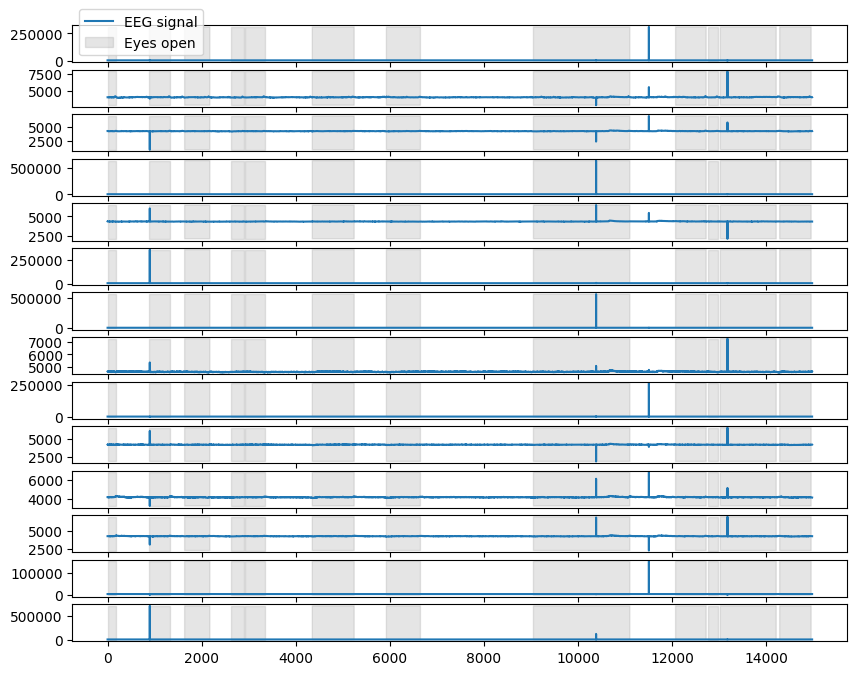

In [ ]:
plot_data(data)

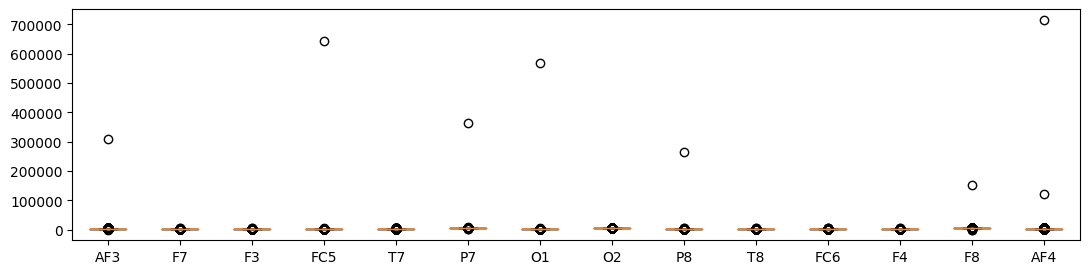

In [ ]:
boxplot_data(data.loc[:, data.columns!='eyeDetection'])

## Eliminación de picos anómalos ##

La forma de onda y la distribución de datos en cada canal demuestran que hay valores anómalos que no pertenecen a las señales, esto se deduce al comparar las señales del dataset con la literatura. 

Es por esto que se hace un preprocesado para eliminar estos valores.

In [ ]:
values = data.values
for i in range(values.shape[1] - 1):
	
	channel_mean, channel_std = np.mean(values[:,i]), np.std(values[:,i])
	
	cut_off = channel_std * 4
	lower, upper = channel_mean - cut_off, channel_mean + cut_off
	
	small_point = [j for j in range(values.shape[0]) if values[j,i] < lower]
	values = np.delete(values, small_point, 0)
	
	big_point = [j for j in range(values.shape[0]) if values[j,i] > upper]
	values = np.delete(values, big_point, 0)
 

In [ ]:
data = pd.DataFrame(data = values,columns = data.columns)

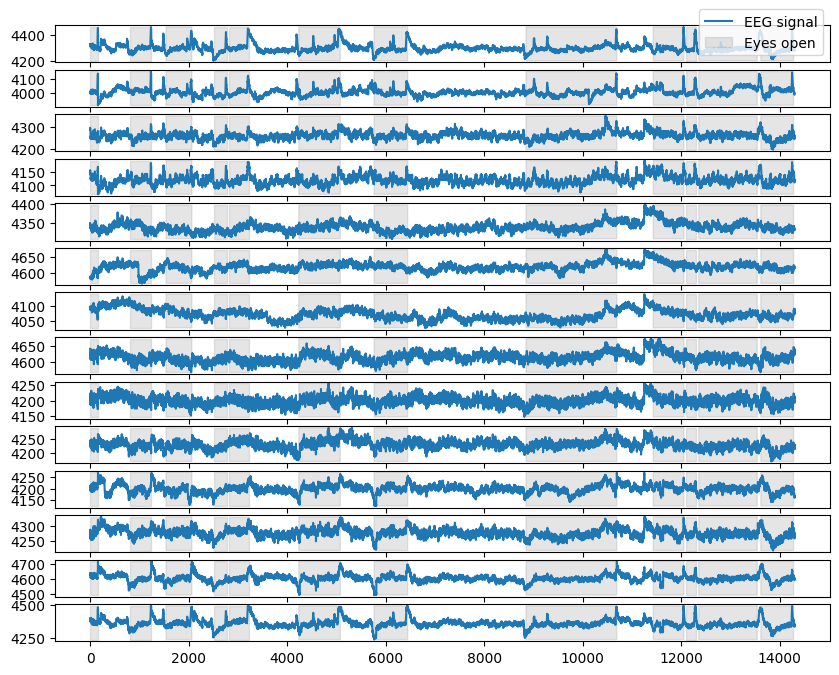

In [ ]:
plot_data(data)

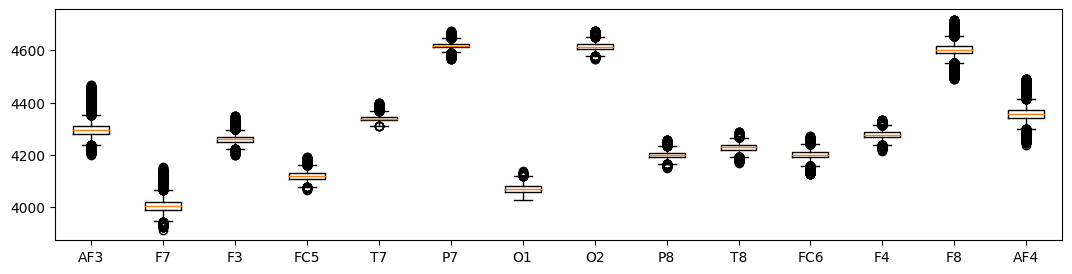

In [ ]:
boxplot_data(data.loc[:, data.columns!='eyeDetection'])

## Filtrado ##

Una vez se puede ver la forma de las señales, se encuentra que tienen un rizado producto del mecanismo de obtención (ruido).  

In [ ]:
filtered_dataset = pd.DataFrame(columns = data.columns)

b, a = signal.butter(8, 0.125)
for channel in data.columns[0:14]:
    filtered_dataset[channel] = signal.filtfilt(b, a, data[channel])

filtered_dataset['eyeDetection'] = data['eyeDetection']

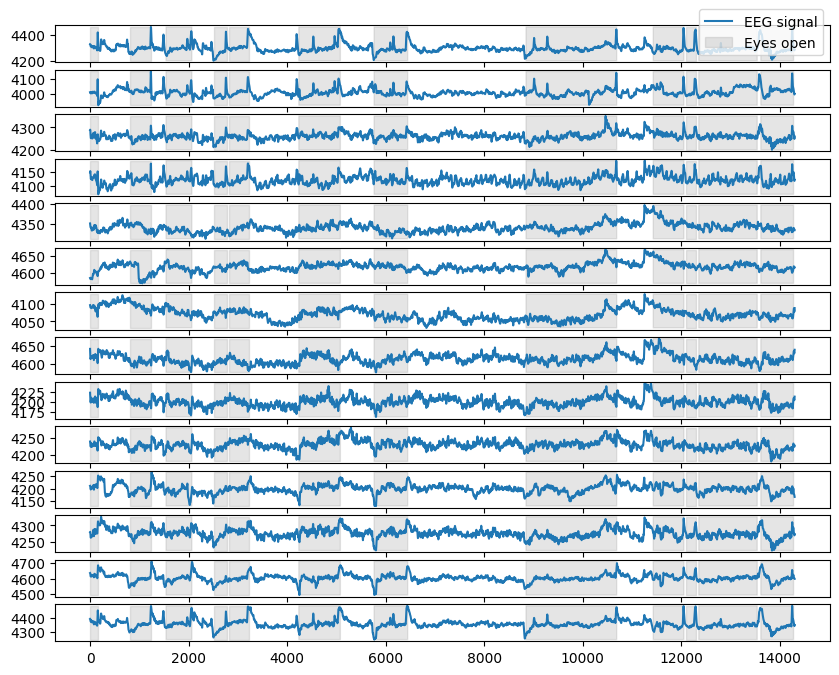

In [ ]:
plot_data(filtered_dataset)

In [ ]:
filepath = Path('dataset.csv')  
filtered_dataset.to_csv(filepath,index=False)

In [ ]:
filtered_dataset

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.252016,4009.179857,4289.183762,4148.152134,4350.206818,4586.192335,4096.912112,4641.068253,4222.047068,4238.504085,4211.262674,4280.509561,4635.972757,4393.821298,0.0
1,4329.276576,4009.545851,4289.846850,4149.876997,4348.948891,4585.743231,4095.969803,4636.083925,4218.658842,4237.629679,4211.043057,4280.843897,4635.782573,4393.707079,0.0
2,4329.159169,4009.806795,4290.179692,4151.312677,4347.709375,4585.291374,4095.038011,4631.297467,4215.329742,4236.671689,4210.680948,4280.980911,4635.374559,4393.398360,0.0
3,4328.778394,4009.867157,4289.906759,4152.195493,4346.505619,4584.844082,4094.130817,4626.895725,4212.129647,4235.577566,4210.075214,4280.766903,4634.586658,4392.737855,0.0
4,4328.044111,4009.656002,4288.829299,4152.322706,4345.356010,4584.412957,4093.264984,4623.032657,4209.126745,4234.316706,4209.161587,4280.097206,4633.308796,4391.620422,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,4283.390677,3993.751719,4250.790123,4117.606639,4333.696587,4615.322201,4079.298329,4631.301166,4205.344250,4223.287428,4172.161819,4270.605627,4597.698679,4343.395492,1.0
14300,4284.007103,3994.371283,4252.408610,4118.006068,4333.510705,4615.571216,4080.885936,4632.827209,4206.714920,4223.697055,4170.925006,4270.959829,4597.405059,4344.680772,1.0
14301,4285.086297,3995.376535,4254.677169,4118.893366,4333.397851,4615.896425,4083.063010,4634.645836,4208.418492,4224.384932,4169.693744,4271.711624,4597.311131,4346.507739,1.0
14302,4286.482753,3996.635858,4257.390748,4120.106515,4333.337273,4616.259804,4085.666276,4636.646824,4210.349296,4225.294850,4168.502346,4272.774026,4597.394210,4348.706258,1.0
